<a href="https://colab.research.google.com/github/sundarp17/sundar_info5731_fall2020/blob/master/INFO5731_Assignment_FOUR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis, and regression analysis.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you understand topic modeling better as well as how to visualize topic modeling results, aims to collect the human meanings of documents. Based on the yelp review data (only the review text will be used for this question), which can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0, **select two models** and write a python program to **identify the top 20 topics (with 15 words for each topic) in the dataset**. Before answering this question, please review the materials in lesson 8, as well as the introduction of these models by the links provided.

(1)   Labeled LDA (LLDA): https://github.com/JoeZJH/Labeled-LDA-Python

(2)   Biterm Topic Model (BTM): https://github.com/markoarnauto/biterm

(3)   HMM-LDA: https://github.com/dongwookim-ml/python-topic-model

(4)   SupervisedLDA: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(5)   Relational Topic Model: https://github.com/dongwookim-ml/python-topic-model/tree/master/notebook

(6)   LDA2VEC: https://github.com/cemoody/lda2vec

(7)   BERTopic: https://github.com/MaartenGr/BERTopic

(8)   LDA+BERT Topic Modeling: https://www.kaggle.com/dskswu/topic-modeling-bert-lda

(9)   Clustering for Topic models: (paper: https://arxiv.org/abs/2004.14914), (code: https://github.com/adalmia96/Cluster-Analysis)


**The following information should be reported:**

(1) Top 20 clusters for topic modeling.

(2) Summarize and describe the topic for each cluster. 

(3) Visualize the topic modeling reasults by using pyLDAVis: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#14.-pyLDAVis


In [ ]:
# Write your code here
import zipfile




In [ ]:

with zipfile.ZipFile('/content/Assignment four data Yelp (question 1 and 2).zip', 'r') as zip_ref:
    zip_ref.extractall('/content/Assignment4')

In [ ]:
import json
reviews=[]

import glob
for files in glob.iglob('/content/Assignment4/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for i in data:
    reviews.append(i['text'])

print("total reviews:",len(reviews))

total reviews: 500000


In [ ]:
ratings=[]
for files in glob.iglob('/content/Assignment4/Assignment four data Yelp (question 1 and 2)/*'):
  f=open(files)
  data=json.load(f)
  for i in data:
    ratings.append(i['stars'])

print("total ratings:",len(ratings))

total ratings: 500000


In [ ]:
import pandas as pd

df = pd.DataFrame(reviews,columns=['review'])
df['ratings']=ratings
df.head()

,review,ratings
0,"Awesome service and fantastic food, the wait s...",5.0
1,Seemed pretty pricey to me for what you got......,2.0
2,We TRIED to go to the buffet on Tuesday eve fo...,1.0
3,Came here for lunch on my 20th birthday and th...,5.0
4,"Amazing treats - I love their cinnamon roll, c...",5.0


In [ ]:
df['ratings']=df['ratings'].astype(int)
df.head()

,review,ratings
0,"Awesome service and fantastic food, the wait s...",5
1,Seemed pretty pricey to me for what you got......,2
2,We TRIED to go to the buffet on Tuesday eve fo...,1
3,Came here for lunch on my 20th birthday and th...,5
4,"Amazing treats - I love their cinnamon roll, c...",5


In [ ]:
import re
#removing punctutations
df['review']=df['review'].map(lambda x: re.sub('[?|!|\'|"|#]', '', x))
#lower
df['review']=df['review'].map(lambda x: x.lower())

df.head(10)

,review,ratings
0,"awesome service and fantastic food, the wait s...",5.0
1,seemed pretty pricey to me for what you got......,2.0
2,we tried to go to the buffet on tuesday eve fo...,1.0
3,came here for lunch on my 20th birthday and th...,5.0
4,"amazing treats - i love their cinnamon roll, c...",5.0
5,me and my family went to tastebuds tonight..i ...,4.0
6,stay away from this train wreck of a hospital ...,1.0
7,i have now had two amazing meals here and cant...,5.0
8,my classmates and i go here because we go to c...,4.0
9,really good service. they helped us pick out f...,5.0


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
words = stopwords.words('english')
from textblob import Word
from textblob import TextBlob
nltk.download('punkt')
nltk.download('wordnet')

df['review']=df['review'].apply(lambda x:" ".join(x for x in x.split() if x not in words))
df['review']=df['review'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

df.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,review,ratings
0,"awesome service fantastic food, wait staff fri...",5.0
1,seemed pretty pricey got.....burgers tasted pr...,2.0
2,"tried go buffet tuesday eve dinner, found clos...",1.0
3,came lunch 20th birthday gave u free dessert s...,5.0
4,"amazing treat - love cinnamon roll, cupcakes, ...",5.0
5,family went tastebud tonight..i love place beg...,4.0
6,"stay away train wreck hospital , er unprofessi...",1.0
7,"two amazing meal cant wait return. steaks, lob...",5.0
8,classmate go go cpcc walking distance class al...,4.0
9,really good service. helped u pick frame whole...,5.0


Supervised LDA

In [ ]:
!pip install tomotopy

     |████████████████████████████████| 13.5MB 330kB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
  Created wheel for py-cpuinfo: filename=py_cpuinfo-7.0.0-cp36-none-any.whl size=20071 sha256=5371b37b91370b2ec707ecf271d3d8fd3737b92841949aead31604b60cdf286d
  Stored in directory: /root/.cache/pip/wheels/f1/93/7b/127daf0c3a5a49feb2fecd468d508067c733fba5192f726ad1
Successfully built py-cpuinfo


In [ ]:
import os
import logging
import nltk
import numpy as np
import matplotlib.pyplot as plt

import tomotopy as tp
mdl = tp.SLDAModel(k=20) #supervisedLDA
for i in df['review']:
    mdl.add_doc(i.split())
for i in range(0, 100, 10):
    mdl.train(10)
    print('Iteration: {}\tLog-likelihood: {}'.format(i, mdl.ll_per_word))
for k in range(mdl.k):
    print('Top 15 words of topic #{}'.format(k))
    print(mdl.get_topic_words(k, top_n=15))

Iteration: 0	Log-likelihood: -10.298571166761924
Iteration: 10	Log-likelihood: -9.754011437161427
Iteration: 20	Log-likelihood: -9.510082878945768
Iteration: 30	Log-likelihood: -9.388092668917666
Iteration: 40	Log-likelihood: -9.31768354270489
Iteration: 50	Log-likelihood: -9.274736236229648
Iteration: 60	Log-likelihood: -9.247037363464484
Iteration: 70	Log-likelihood: -9.228078411644322
Iteration: 80	Log-likelihood: -9.213215817637758
Iteration: 90	Log-likelihood: -9.201066733854097
Top 15 words of topic #0
[('sushi', 0.02402769774198532), ('roll', 0.013485962525010109), ('good', 0.010328955948352814), ('place', 0.00963932741433382), ('fish', 0.009361735545098782), ('like', 0.008694353513419628), ('really', 0.006655452772974968), ('meat', 0.00658871466293931), ('-', 0.00627146614715457), ('korean', 0.0061080059967935085), ('also', 0.005646641831845045), ('food', 0.0056002154015004635), ('eat', 0.005419345106929541), ('ordered', 0.0051939827390015125), ('one', 0.005089522805064917)]
To

Topic 1: The ordered sushi roll at this korean place was good.
----------------------------------------------------------------------
Topic 2: The pizza and the italian pasta was good with cheese and sauce.
----------------------------------------------------------------------
Topic 3: The server didn't took much time to bring the food to the table.
------------------------------------------------------------------------
Topic 4: The customer didnt liked the service.
------------------------------------------------------------------------
Topic 5: It was a great place to have food and I love the service provided by the friendly staff.
-----------------------------------------------------------------------
Topic 6: It is about what the customer ordered to eat.
------------------------------------------------------------------------
Topic 7: Different types of food items available like chicken, thai, chinese.
------------------------------------------------------------------------
Topic 8: The bar was a good place to have beer and food.
------------------------------------------------------------------------
Topic 9: Customer ordered food in spanish.
-----------------------------------------------------------------------
Topic 10: About the car parking.
------------------------------------------------------------------------
Topic 11: The room in the casino hotel was nice and the hotel contains a pool.
----------------------------------------------------------------------
Topic 12: Token of appriciation about the staff and the restaurant.
----------------------------------------------------------------------
Topic 13: Chicken burger sandwich was good.
----------------------------------------------------------------------
Topic 14: Love the food at the restaurant and definitely a good place to come back.
----------------------------------------------------------------------
Topic 15: Mexican food was great at this restaurant.
-----------------------------------------------------------------------
Topic 16: One of the night places to look
----------------------------------------------------------------------
Topic 17: Regarding car service.
-------------------------------------------------
Topic 18: It is about a salon shop and how great the services provided there like the massage, haircut.
------------------------------------------------------------------------
Topic 19: like to spend time at this store.
-----------------------------------------------------------------------
Topic 20: Customer ordered Iced coffee tea and a choclate cake.
-------------------------------------------------------------------------

In [ ]:
!pip install pyLDAvis
import numpy as np
import pyLDAvis


topic_term_dists = np.stack([mdl.get_topic_word_dist(k) for k in range(mdl.k)])
doc_topic_dists = np.stack([doc.get_topic_dist() for doc in mdl.docs])
doc_lengths = np.array([len(doc.words) for doc in mdl.docs])
vocab = list(mdl.used_vocabs)
term_frequency = mdl.used_vocab_freq

prepared_data = pyLDAvis.prepare(
    topic_term_dists, 
    doc_topic_dists, 
    doc_lengths, 
    vocab, 
    term_frequency
)
pyLDAvis.save_html(prepared_data, 'ldavis.html')

     |████████████████████████████████| 1.6MB 5.6MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7a8ed8bcf8634a4695b44e4ae62319b08e6344b7072cc2a71fc1ca1ea9bd8521
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


BIterm
**bold text**

In [ ]:
!pip install biterm

     |████████████████████████████████| 81kB 3.6MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp36-cp36m-linux_x86_64.whl size=195423 sha256=14efc292d399b11955a6f3b7ace77fe074d2b7ac541e4f9c8ea6e34d06cfd6f4
  Stored in directory: /root/.cache/pip/wheels/86/04/10/231fb1d39d86ab58c2683fd3d4fe8415a5bc284ba8a20fd638
Successfully built biterm


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from biterm.btm import oBTM
from biterm.utility import vec_to_biterms, topic_summuary

reviews_biterm = df['review'].head(100).values
XTf_vec = TfidfVectorizer(stop_words='english')
X_TFIDF_trans = XTf_vec.fit_transform(reviews_biterm).toarray()


vocab = np.array(XTf_vec.get_feature_names())
words = vec_to_biterms(X_TFIDF_trans)

bi_term_model = oBTM(num_topics=20, V=vocab)
model_btm = bi_term_model.fit_transform(words, iterations=10)


topic_summuary(bi_term_model.phi_wz.T, X_TFIDF_trans, vocab, 15)





  0%|          | 0/10 [00:00<?, ?it/s]



 10%|█         | 1/10 [00:27<04:09, 27.72s/it]



 20%|██        | 2/10 [00:55<03:41, 27.75s/it]



 30%|███       | 3/10 [01:23<03:14, 27.74s/it]



 40%|████      | 4/10 [01:50<02:46, 27.70s/it]



 50%|█████     | 5/10 [02:18<02:18, 27.69s/it]



 60%|██████    | 6/10 [02:46<01:50, 27.75s/it]



 70%|███████   | 7/10 [03:14<01:23, 27.76s/it]



 80%|████████  | 8/10 [03:41<00:55, 27.73s/it]



 90%|█████████ | 9/10 [04:09<00:27, 27.74s/it]



100%|██████████| 10/10 [04:37<00:00, 27.73s/it]


Topic 0 | Coherence=-107.10 | Top words= seat went good place like cheese lack girlfriend served saturday know got 24 going offer
Topic 1 | Coherence=-99.24 | Top words= sweet sandwich food huge order coffee love crispy sauce good cooked friendly definitely regular awesome
Topic 2 | Coherence=-123.68 | Top words= worth butter need want meal recommend service place highly food got pricey problem fry steak
Topic 3 | Coherence=-143.43 | Top words= food good like come bit great night dont seated excellent way thing place choice server
Topic 4 | Coherence=-129.35 | Top words= make care good super im come ive instead great service got serve money better thought
Topic 5 | Coherence=-110.67 | Top words= place attentive sandwich spot enjoy best 15 minute line service 20 expect dont date happy
Topic 6 | Coherence=-76.61 | Top words= asked feel week better business like wont used famous didnt scarborough hell usually dont issue
Topic 7 | Coherence=-112.52 | Top words= food great indian asked brin

{'coherence': [-107.10077944838329,
  -99.24408114452598,
  -123.67598997843237,
  -143.4342332500792,
  -129.3519813170975,
  -110.6685753783218,
  -76.60874984557817,
  -112.51953924432667,
  -130.39201429208472,
  -127.47673455625197,
  -138.9880600709542,
  -121.51716481397806,
  -135.3000847124247,
  -118.10937556264159,
  -139.24072308878283,
  -45.61371736378968,
  -146.9638030664805,
  33.8406173504967,
  -141.50159891117258,
  -87.41627182495634],
 'top_words': [array(['seat', 'went', 'good', 'place', 'like', 'cheese', 'lack',
         'girlfriend', 'served', 'saturday', 'know', 'got', '24', 'going',
         'offer'], dtype='<U14'),
  array(['sweet', 'sandwich', 'food', 'huge', 'order', 'coffee', 'love',
         'crispy', 'sauce', 'good', 'cooked', 'friendly', 'definitely',
         'regular', 'awesome'], dtype='<U14'),
  array(['worth', 'butter', 'need', 'want', 'meal', 'recommend', 'service',
         'place', 'highly', 'food', 'got', 'pricey', 'problem', 'fry',
         '

In [ ]:
'''
Topic 1: went to a good place with girlfriend on saturday
Topic 2: About how good is the food
Topic 3: About the service of the food
Topic 4: About how good is the food at night
Topic 5: About car service
Topic 6: Waiting for sandwich(it took 15mins)
Topic 7: About business of last week
Topic 8: Giving advice to business staff on how to improve 
Topic 9: review of a restaurant( food and service was good)
Topic 10: Explained how great is the place with fantastic prices
Topic 11: About how good is the place and food at the bar
Topic 12: About the type of food ordered
Topic 13: About the friendly staff
Topic 14: About the deal on the food
Topic 15: The place was fabulous with great food and people
Topic 16: About the place(explained in temperature perspective)
Topic 17: No time to eat buffet
Topic 18: Explaining an issue
Topic 19: About how good is food and it served in a little time
Topic 20: About how he came late( came in the wrong time)

'''

In [ ]:
import pyLDAvis
prepared_biterm=pyLDAvis.prepare(bi_term_model.phi_wz.T, model_btm, np.count_nonzero(X_TFIDF_trans, axis=1), vocab, np.sum(X_TFIDF_trans, axis=0))
pyLDAvis.save_html(prepared_biterm, 'biterm.html')

# **Question 2: Yelp Review Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.

The data can be download from Dropbox: https://www.dropbox.com/s/59hsrk56sfwh9u2/Assignment%20four%20data%20Yelp%20%28question%201%20and%202%29.zip?dl=0 

The data was saved in json format, here is an example of the data (for this task, you only need to use the star rating and the review text fields):

{
    // string, 22 character unique review id
    "review_id": "zdSx_SD6obEhz9VrW9uAWA",

    // string, 22 character unique user id, maps to the user in user.json
    "user_id": "Ha3iJu77CxlrFm-vQRs_8g",

    // string, 22 character business id, maps to business in business.json
    "business_id": "tnhfDv5Il8EaGSXZGiuQGg",

    // integer, star rating
    "stars": 4,

    // string, date formatted YYYY-MM-DD
    "date": "2016-03-09",

    // string, the review itself
    "text": "Great place to hang out after work: the prices are decent, and the ambience is fun. It's a bit loud, but very lively. The staff is friendly, and the food is good. They have a good selection of drinks.",

    // integer, number of useful votes received
    "useful": 0,

    // integer, number of funny votes received
    "funny": 0,

    // integer, number of cool votes received
    "cool": 0
}

The sentiment of can be accessed based on the star rating, if no star information avaliable for a record, just remove that record. Detail star and sentiment level can be matched blew:

Very positive = 5 stars

Positive = 4 stars

Neutral = 3 stars

Negative = 2 stars

Very negative = 1 star

Here is code for yelp data preprocessing: https://github.com/Yelp/dataset-examples. 

Answer the following questions:

(1) Features used for sentiment classification and explain why you select these features (tf-idf, sentiment lexicon, word2vec, etc). Considering achieve the best performance as you can. 

(2) Select two of the supervised learning algorithm from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build a sentiment classifier respectively. 

(3) Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9. 

In [ ]:
df.loc[df['ratings']==5,'ratings'] = 'very positive'
df.loc[df['ratings']==4,'ratings'] = 'positive'
df.loc[df['ratings']==3,'ratings'] = 'neutral'
df.loc[df['ratings']==2,'ratings'] = 'negative'
df.loc[df['ratings']==1,'ratings'] = 'very negative'
df.head(10)

,review,ratings
0,"awesome service fantastic food, wait staff fri...",very positive
1,seemed pretty pricey got.....burgers tasted pr...,negative
2,"tried go buffet tuesday eve dinner, found clos...",very negative
3,came lunch 20th birthday gave u free dessert s...,very positive
4,"amazing treat - love cinnamon roll, cupcakes, ...",very positive
5,family went tastebud tonight..i love place beg...,positive
6,"stay away train wreck hospital , er unprofessi...",very negative
7,"two amazing meal cant wait return. steaks, lob...",very positive
8,classmate go go cpcc walking distance class al...,positive
9,really good service. helped u pick frame whole...,very positive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['review'])
print(X_tfidf.shape)


(500000, 169280)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
mnb = MultinomialNB()
svm = LinearSVC()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, df['ratings'], test_size=0.2, random_state=42)
model_mnb = mnb.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred_mnb = model_mnb.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_mnb,y_test))
print(classification_report(y_test,y_pred_mnb))

Accuracy 0.55819
               precision    recall  f1-score   support

     negative       0.06      0.00      0.00      8121
      neutral       0.24      0.00      0.01     11293
     positive       0.33      0.19      0.24     22512
very negative       0.75      0.64      0.69     14147
very positive       0.57      0.97      0.71     43927

     accuracy                           0.56    100000
    macro avg       0.39      0.36      0.33    100000
 weighted avg       0.46      0.56      0.47    100000



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, x_test, y_test, cv=10)
print("using MNB",scores.mean())

using MNB 0.46617


In [ ]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))
print(classification_report(y_test,y_pred_svm))

Accuracy 0.65581
               precision    recall  f1-score   support

     negative       0.44      0.23      0.30      8121
      neutral       0.46      0.31      0.37     11293
     positive       0.50      0.44      0.47     22512
very negative       0.71      0.84      0.77     14147
very positive       0.74      0.88      0.80     43927

     accuracy                           0.66    100000
    macro avg       0.57      0.54      0.54    100000
 weighted avg       0.63      0.66      0.63    100000



In [ ]:
scores = cross_val_score(svm, x_test, y_test, cv=10)
print("using svm",scores.mean())

using svm 0.6369900000000001


I selected linear svm and multinomial naivee bayes algorithms.

I performed tf-idf as is it balances out the term frequency (how often the word appears in the document) with its inverse document frequency (how often the term appears across all documents in the data set).
---------------------------------------------------------------
This means that words like “a” and “the” will have very low scores as they’ll appear in all documents in your set. Rarer words like for example 'Natural language processing' will be very common in just a handful of documents which talk about text classification. TF-IDF will give higher scores to these words and thus they’ll be the ones that the model identifies as important and tries to learn.
-----------------------------------------------------------------------

Using MNB i got 

accuracy: 55.8
                  precision    recall  f1-score   support

     negative       0.06      0.00      0.00      8121
      neutral       0.24      0.00      0.01     11293
     positive       0.33      0.19      0.24     22512
very negative       0.75      0.64      0.69     14147
very positive       0.57      0.97      0.71     43927


using SVM i got

accuracy: 65.5

                 precision    recall  f1-score   support

     negative       0.44      0.23      0.30      8121
      neutral       0.46      0.31      0.37     11293
     positive       0.50      0.44      0.47     22512
very negative       0.71      0.84      0.77     14147
very positive       0.74      0.88      0.80     43927

As you can see svm algorithm is better for this dataset as it has more accuracy, precision, recall, f1 score.


# **Question 3: House price prediction**

(40 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from Dropbox: https://www.dropbox.com/s/52j9hpxppfo921o/assignment4-question3-data.zip?dl=0. Here is an axample for the implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878. 


In [ ]:
# Write your code here
import pandas as pd
train = pd.read_csv(r'/content/train.csv')
test = pd.read_csv(r'/content/test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
print(train.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
len(train)

1460

In [ ]:
pd.set_option('max_rows', 99999)

In [ ]:
print(train.isnull().sum()*100/train.isnull().count())

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


deleted some columns as they have more null values.

In [ ]:

train.fillna(train.mean(), inplace = True)
test.fillna(test.mean(), inplace = True)

In [ ]:
train=train.drop(['PoolQC','Fence','MiscFeature','FireplaceQu','Alley','LotFrontage'],axis=1)

In [ ]:

print(train.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64


In [ ]:
correlation = train.corr()
print('Correlation Values:\n', correlation["SalePrice"].sort_values(ascending=False))

Correlation Values:
 SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, 

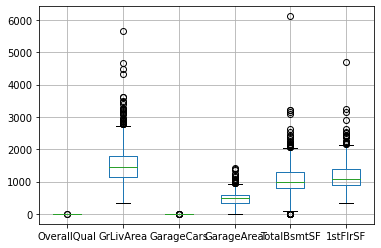

In [ ]:
train.boxplot(column=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF'])


In [ ]:
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
train['GrLivArea']=winsorize(train['GrLivArea'],limits=[0.05,0.05])
train['GarageArea']=winsorize(train['GarageArea'],limits=[0.05,0.05])
train['TotalBsmtSF']=winsorize(train['TotalBsmtSF'],limits=[0.05,0.05])
train['1stFlrSF']=winsorize(train['1stFlrSF'],limits=[0.05,0.05])

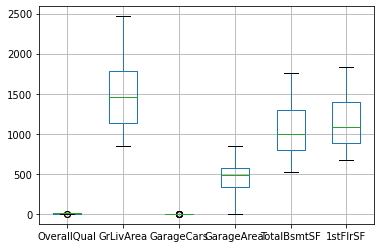

In [ ]:
train.boxplot(column=['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF'])


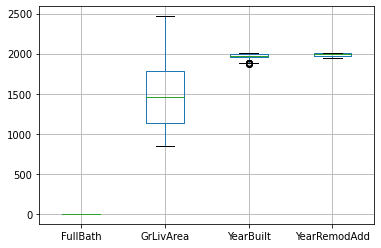

In [ ]:
train.boxplot(column=['FullBath','GrLivArea','YearBuilt','YearRemodAdd'])

In [ ]:
cols=train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','GrLivArea','YearBuilt','YearRemodAdd']]
test_cols=test[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','GrLivArea','YearBuilt','YearRemodAdd']]



In [ ]:
test_cols.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
GrLivArea       0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [ ]:
y=train['SalePrice']
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics

x_train,x_test,y_train,y_test=train_test_split(cols.values,y.values,random_state=1,test_size=0.25)
lm = LinearRegression(normalize=True)
model = lm.fit(x_train,y_train)
y_pred = lm.predict(test_cols)
model.score(cols,y)

0.7751584204953317

In [ ]:
test['predicted']=y_pred
test['predicted'].head(10)

0    110168.478234
1    165743.677033
2    168730.155484
3    185742.006858
4    219712.225314
5    177171.836192
6    174269.651827
7    168579.861828
8    213403.766308
9     97684.431142
Name: predicted, dtype: float64